# Data Analysis with PyROOT

While ROOT is natively a C++ framework, it can also be used in Python. To do this, CERN has created PyROOT, a ROOT library in Python. PyROOT is extremely similar to ROOT, and it is often called "Python-flavored ROOT". To use PyROOT, you only need to have <a href="https://root.cern/install/">ROOT installed</a>. To check if ROOT is installed, run <code>root --version</code>. Once it is installed, simply run

In [2]:
import ROOT

Welcome to JupyROOT 6.28/04


to import PyROOT into your Python 3 Notebook.

### Opening Files

To begin working with PyROOT, we must first open a ROOT file in the notebook. Throughout this tutorial, we will use data from an experiment run in Hall A of Jefferson Lab using the hadronic calorimeter (HCal) to measure the radius of nucleons. If you would like to follow along, you can download the file <a href="https://hallaweb.jlab.org/users/camsonne/SULI/hcal_gmn_fullreplay_13747_stream0_seg0_0.root">here</a>. To open the file, we use PyROOT's <code>TFile()</code> function, similar to ROOT. For example:

In [3]:
f = ROOT.TFile("hcal_gmn_fullreplay_13747_stream0_seg0_0.root")

Warning in <TClass::Init>: no dictionary for class THaRunParameters is available
Warning in <TClass::Init>: no dictionary for class THaEvent is available
Warning in <TClass::Init>: no dictionary for class THaEventHeader is available
Warning in <TClass::Init>: no dictionary for class THaRun is available
Warning in <TClass::Init>: no dictionary for class THaCodaRun is available
Warning in <TClass::Init>: no dictionary for class THaRunBase is available
Warning in <TClass::Init>: no dictionary for class DAQInfoExtra is available
Warning in <TClass::Init>: no dictionary for class DAQconfig is available


From here, we can use the <code>Get()</code> method to access the <code>'T'</code> TTree in <code>f</code> like so

In [4]:
T = f.Get('T')

### Reading the TTree

After we have created our TTree object, we can read the TTree structure by calling the <code>Print()</code> method on <code>T</code>.

In [ ]:
T.Print()

### Graphing with PyROOT

To start graphing in PyROOT, we first need to create a canvas to graph on using ROOT's TCanvas object. To do this, we can use PyROOT's <code>TCanvas()</code> function like so

In [5]:
c = ROOT.TCanvas("c", "c", 800, 600)

We have created an TCanvas object <code>c</code> named "c" with a title of "c", a width of 800, and a height of 600. Now, we can graph a branch of our TTree <code>T</code> onto our canvas <code>c</code>. For example, lets graph a histogram of the energy readings from the HCal detector in SuperBigBite:

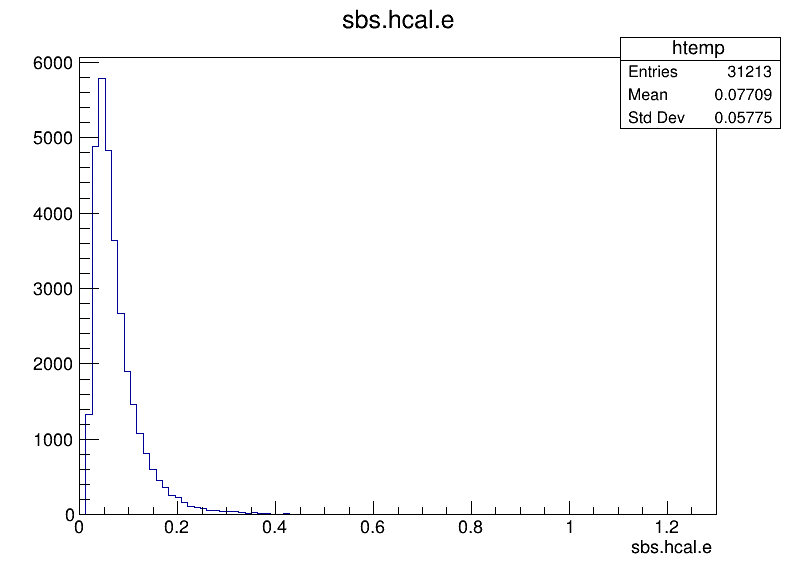

In [5]:
T.Draw("sbs.hcal.e")
c.Draw()

We use the <code>Draw()</code> method of <code>T</code> to draw a branch onto our canvas. We pass in the argument <code>"sbs.hcal.e"</code> to specify that we want to draw the branch of energy from HCal in SuperBigBite. After we draw the data onto our canvas, we need to call <code>Draw()</code> once more on our canvas <code>c</code> to output our graph.

### 2D Graphs

Using PyROOT, it is possible to plot 2D graphs of two branches from our TTree. We can do this by joining two branches together inside the <code>Draw()</code> function using a colon like so  

In [6]:
T.Draw("sbs.hcal.y:sbs.hcal.x")

Here, we have drawn a scatter plot of the x and y positions of the particles in HCal. Since we have not created a new canvas, the <code>Draw()</code> function draws the graph onto the canvas <code>c</code>. Since the old graph has now be overwritten, we can output the new graph by calling <code>Draw()</code> on <code>c</code> again.

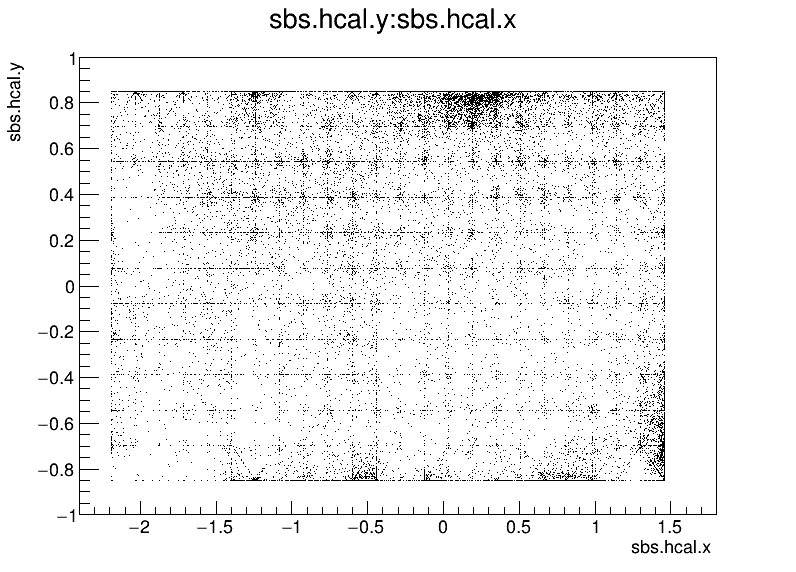

In [8]:
c.Draw()

We can do the same thing with data from the Shower electric calorimeter in the BigBite detector. We can plot a graph of the energy versus x position of particles like so 

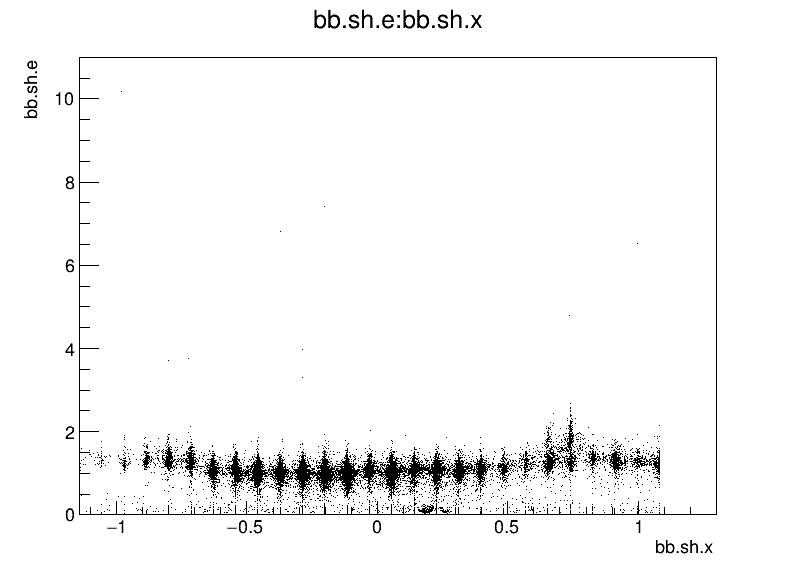

In [9]:
T.Draw("bb.sh.e:bb.sh.x")
c.Draw()

### 3D Graphs

Similar to 2D graphs, it is possible to create 3D graphs using PyROOT by simply adding another branch inside the <code>Draw()</code> function like so

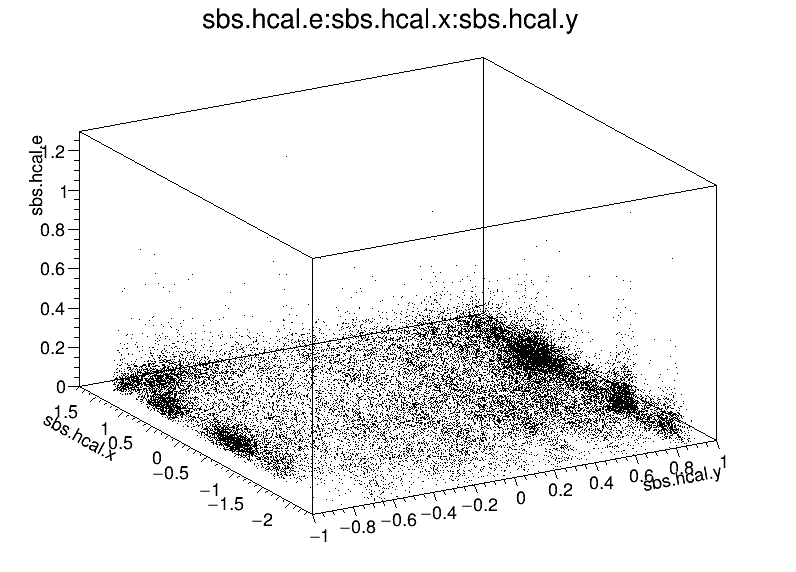

In [13]:
T.Draw("sbs.hcal.e:sbs.hcal.x:sbs.hcal.y", "", "surf")
c.Draw()

Here we have created a 3D graph of the x position, y position, and energy of particles from HCAl in SuperBigBite by joining the three branches of the TTree together using a colon.